# Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Import the functions to do PCA, ICA and Archetypal Analysis
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import archetypes as arch

sns.set()

# Processing

## Functions

In [29]:
def plot_participants(dfs, length, biomarker, title):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    for i in range(length):
        ax.plot(dfs.iloc[:, i])
    ax.set_title(f"{biomarker} of participants in round 1 phase 1", size=22)
    ax.set_xlabel("Timestep", size=18)
    ax.set_ylabel(f"{biomarker}", size=16)
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.legend(dfs.columns)
    plt.title(title, x=0.5, y=1.)
    plt.show()

In [31]:
def plot_components(aa_model, n_components):
    fig, ax = plt.subplots(1, n_components, figsize=(20, 5))
    for i in range(n_components):
        ax[i].plot(aa_model.archetypes_[i, :])
        ax[i].set_title(f"Archetype {i + 1}", size=22)
        ax[i].set_xlabel("Timestep", size=18)
        ax[i].set_ylabel(f"{biomarker}", size=16)
        ax[i].legend(["Archetype"])
        ax[i].tick_params(axis='both', which='major', labelsize=16)

    plt.show()

## Roles

In [9]:
path = f"../../data/D1_1/team_info.csv"
df_roles = pd.read_csv(path)
df_roles.drop(columns=["Unnamed: 0"], inplace=True)
df_roles

,ID,Team,Puzzler
0,ID_1,2,1
1,ID_2,2,0
2,ID_3,1,0
3,ID_4,3,1
4,ID_5,3,0
5,ID_6,4,0
6,ID_7,4,1
7,ID_8,1,1


In [10]:
solvers = df_roles[df_roles['Puzzler'] == 1]['ID'].tolist()
instructors = df_roles[df_roles['Puzzler'] == 0]['ID'].tolist()

In [11]:
def get_dfs(participants, biomarker):
    rounds = [1,2,3,4] # 4 rounds
    phases = [3] # 3 phases

    timesteps = []
    dfs = []
    dfs_w_ = []

    t_sample_dict = {"HR": 1, "EDA": 4, "TEMP": 4, "BVP": 64} # Measurement per second for each biomarker
    t_sample = t_sample_dict[biomarker]
    t_outlier = 290 * t_sample # remove samples measured for less than 290 seconds
    t_max = 300 * t_sample

    for r in rounds:
        for p in phases:
            for id in participants:
                path = f"../../data/D1_1/{id}/round_{r}/phase{p}/{biomarker}.csv"
                df = pd.read_csv(path)

                if df.shape[0] < t_outlier: # remove outliers
                    continue

                timesteps.append(df.shape[0])
                df = df[:t_max] # first 5 minutes
                df.rename(columns={"Unnamed: 0": "timestep"}, inplace=True)
                
                df.drop(columns=["time"], inplace=True)
                key = "r" + str(r) + "_p" + str(p) + "_" + id
                df.rename(columns={biomarker: key}, inplace=True)     
                if type(dfs) == list: # merge dfs
                    dfs = df
                else:
                    dfs = pd.merge(dfs, df, on="timestep")
                    
    dfs.drop("timestep", inplace=True, axis=1)
    return dfs

### AA Solvers

In [22]:
biomarker="TEMP"
dfs = get_dfs(solvers, biomarker)
dfs

,r1_p3_ID_1,r1_p3_ID_4,r1_p3_ID_7,r1_p3_ID_8,r2_p3_ID_1,r2_p3_ID_4,r2_p3_ID_7,r2_p3_ID_8,r3_p3_ID_1,r3_p3_ID_4,r3_p3_ID_7,r3_p3_ID_8,r4_p3_ID_1,r4_p3_ID_4,r4_p3_ID_7,r4_p3_ID_8
0,32.97,32.34,34.50,31.17,34.13,31.95,33.84,30.19,35.03,31.85,32.71,30.39,35.39,31.51,32.55,31.17
1,32.97,32.34,34.50,31.17,34.13,31.95,33.87,30.19,35.03,31.85,32.71,30.39,35.39,31.51,32.55,31.17
2,32.97,32.34,34.50,31.17,34.13,31.95,33.87,30.19,35.03,31.85,32.68,30.33,35.39,31.51,32.57,31.17
3,32.95,32.34,34.50,31.17,34.15,31.99,33.87,30.19,35.05,31.85,32.68,30.33,35.39,31.51,32.57,31.17
4,32.95,32.34,34.50,31.13,34.15,31.99,33.87,30.19,35.05,31.85,32.68,30.33,35.39,31.51,32.57,31.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,33.00,31.89,35.34,30.81,34.50,31.61,34.53,29.49,35.23,31.29,33.43,30.53,35.23,31.43,32.57,31.35
1196,33.00,31.89,35.34,30.79,34.50,31.61,34.53,29.49,35.23,31.29,33.43,30.53,35.23,31.43,32.57,31.35
1197,33.00,31.89,35.34,30.79,34.50,31.61,34.50,29.49,35.23,31.29,33.43,30.53,35.23,31.43,32.57,31.35
1198,33.00,31.87,35.34,30.79,34.50,31.61,34.50,29.49,35.23,31.29,33.45,30.53,35.21,31.43,32.57,31.35


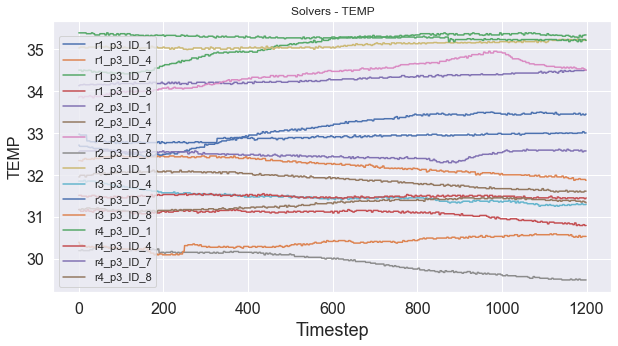

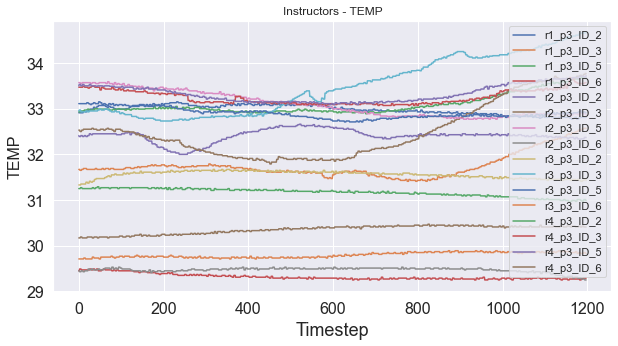

In [32]:
df_solvers = get_dfs(solvers, biomarker)
plot_participants(df_solvers, dfs.shape[1], biomarker, f"Solvers - {biomarker}")

df_instructors = get_dfs(instructors, biomarker)
plot_participants(df_instructors, dfs.shape[1], biomarker, f"Instructors - {biomarker}")

In [26]:
n_components = 5

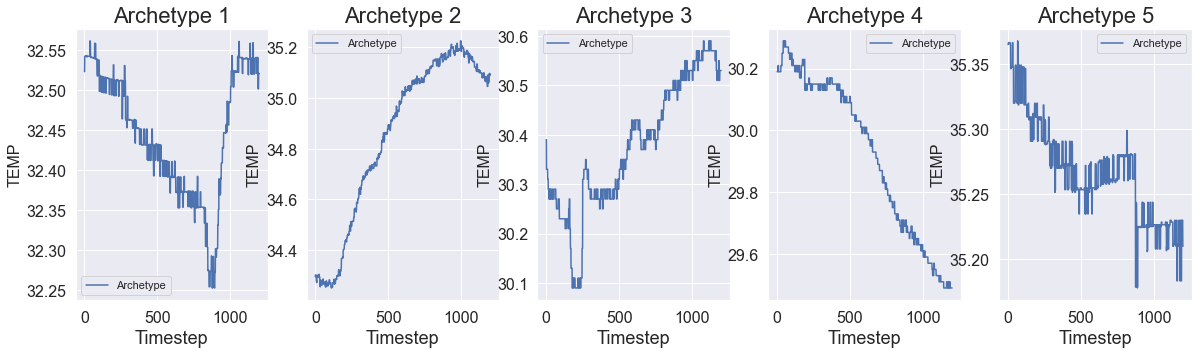

In [27]:
# AA
aa_model = arch.AA(n_archetypes=n_components)
aa = aa_model.fit_transform(df_solvers.T)

# Plot archetypes
plot_components(aa_model, n_components)

### AA instructors

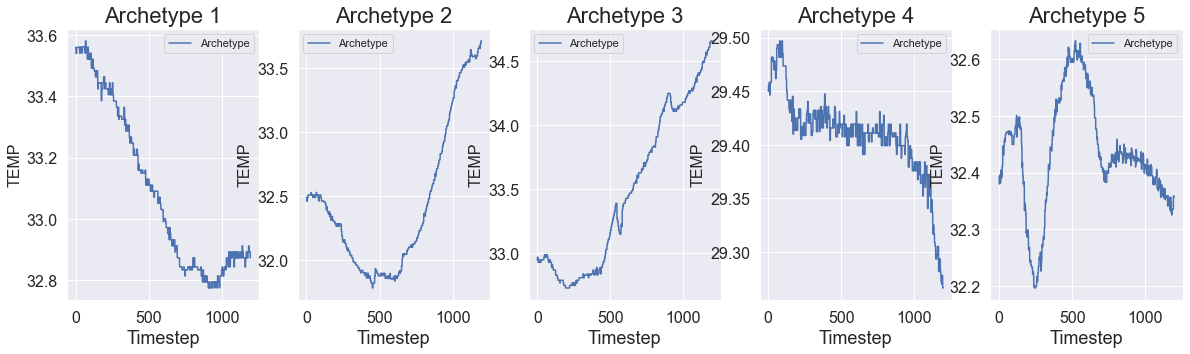

In [28]:
# AA
aa_model = arch.AA(n_archetypes=n_components)
aa = aa_model.fit_transform(df_instructors.T)

# Plot the archetypes
plot_components(aa_model, n_components)